# **Измерение мира: ошибки и аппроксимации в вычислительной математике**

## **Инструкция для студентов**

- Выполните все упражнения, помеченные **YOUR CODE HERE** или *ВАШ КОММЕНТАРИЙ ЗДЕСЬ*.
- Убедитесь, что ваш код является оригинальным и не сгенерирован инструментами искусственного интеллекта.
- Прокомментируйте свой код, чтобы объяснить свои рассуждения.
- Отправьте заполненный блокнот в соответствии с приведенными рекомендациями Moodle до конца занятия.

In [ ]:
%pip install numpy
%pip install matplotlib

## **Table of Contents**

1. [Введение](#introduction)
2. [Понимание ошибок и приближений](#understanding-errors-and-approximations)
   - [Исторический контекст](#historical-context)
   - [Типы погрешностей](#types-of-errors)
   - [Источники ошибок](#sources-of-errors)
3. [Значимые цифры и точность](#significant-figures-and-precision)
4. [Упражнения на вычисления](#computational-exercises)
   - [Упражнение 1. Абсолютные и относительные погрешности](#exercise-1-absolute-and-relative-errors)
   - [Упражнение 2. Аппроксимация рядами Тейлора](#exercise-2-taylor-series-approximation)
   - [Упражнение 3: Арифметика с плавающей точкой](#exercise-3-floating-point-arithmetic)
5. [Современные численные методы](#modern-numerical-methods)
   - [5.1 Как современные методы могли бы помочь Мешену и Деламбру](#how-modern-methods-could-have-helped)
     - [5.1.1 Метод наименьших квадратов](#least-squares-method)
     - [5.1.2 Метод Монте-Карло](#monte-carlo-simulations)
   - [Упражнение 4: Метод наименьших квадратов](#exercise-4-least-squares-method)
   - [Упражнение 5: Метод Монте-Карло](#exercise-5-monte-carlo-simulations)
6. Продвинутые темы по теории погрешностей
   - [Общая формула погрешности](#general-formula-of-error)
   - [Обратная задача теории ошибок](#inverse-problem-of-error-theory)
   - [Теория несоответствий](#discrepancies-theory)
   - [Парадокс береговой линии](#the-coastline-paradox)
   - [Основы фрактальной теории](#fractal-theory-basics)
   - [Основы теории хаоса](#basics-of-chaos-theory)
7. [Conclusion](#conclusion)
8. [References](#references)

<a name="introduction"></a>
## **1. Введение**

Добро пожаловать в это исследование ошибок и приближений в вычислительной математике, дополненное увлекательной историей измерения мира, рассказанной в книге Кена Алдера "Мера всех вещей (The Measure of All Things.)".*

* "После Французской революции два астронома, Пьер Мешен и Жан-Батист Деламбр, предприняли трудную экспедицию для измерения меридиана по всей Франции от Дюнкерка до Барселоны. Их миссия: определить метр как одну десятимиллионную часть расстояния от Северного полюса до экватора, установив универсальную единицу измерения, закрепленную в природе".*

Этот поиск был сопряжен с трудностями, которые подчеркивают критическую важность понимания ошибок при измерениях и управления ими — тема, которая сегодня находит глубокий отклик в вычислительной математике.

Астрономы использовали триангуляцию для измерения дуги меридиана. Они измеряли углы между точками и использовали эти измерения для вычисления расстояний. В число используемых ими инструментов входили теодолиты и цепи, которые имели свои ограничения.

*Ученые были потрясены разнообразием мер и весов, которые они видели вокруг себя. В XVIII веке меры отличались не только от нации к нации, но и внутри самих наций. Это разнообразие затрудняло коммуникации и торговлю, а также государственное управление. Это также затрудняло ученым сравнивать свои результаты с результатами их коллег. Один англичанин, путешествовавший по Франции накануне революции, обнаружил, что тамошнее разнообразие причиняет ему мучения. “Во Франции, - жаловался он, - бесконечная запутанность принимаемых мер превосходит всякое понимание. Они различаются не только в каждой провинции, но и в каждом округе и почти в каждом городе. . ..”По оценкам современников, под прикрытием примерно восьмисот наименований Древний режим Франции использовал ошеломляющие 250 000 различных единиц веса и мер.*

---

<a name="understanding-errors-and-approximations"></a>
## **2. Понимание ошибок и приближений**

<a name="historical-context"></a>
### **2.1 Исторический контекст**

- **Проблемы миссии**: Расхождения в измерениях из-за особенностей местности, погоды и ограниченного оборудования.
- **Дилемма Мешена**: Он обнаружил ошибки в своих измерениях, но боролся с их раскрытием, иллюстрируя глубокое влияние, которое ошибки могут оказать на научную целостность и прогресс.


<a name="types-of-errors"></a>
### **2.2 Типы погрешностей**

- **Абсолютная погрешность**: Разница между измеренным или приблизительным значением и истинным значением.
- **Относительная погрешность**: Абсолютная погрешность, деленная на истинное значение, часто выражается в процентах.

*Напишите какие ещё типы погрешностей Вы знаете и как они могли бы быть полезны в этой миссии*

- Систематические погрешности:
  Постоянное смещение измерений в одном направлении (например, из-за неправильной калибровки прибора). В экспедиции их можно выявлять и компенсировать с помощью калибровки и корректирующих факторов.

- Случайные погрешности:
  Непредсказуемые вариации, возникающие из-за случайных факторов (например, колебания погодных условий). Их можно уменьшить, проводя множество измерений и усредняя результаты.

<a name="sources-of-errors"></a>
### **2.3 Источники ошибок**

1. **Человеческие ошибки**: Ошибки при вводе данных, расчетах или методологические ошибки.
2. **Инструментальные ошибки**: Ограничения или неисправности измерительных приборов.
3. **Вычислительные ошибки**: Ошибки, вызванные численными методами или компьютерными арифметическими ограничениями.

*Напишите какие ещё источники погрешностей Вы знаете*

- погрешность действий
- начальная погрешность
- погрешности метода

Ошибки в измерениях неизбежны. Деламбер и Мешейн столкнулись с ошибками, связанными с точностью приборов, факторами окружающей среды и человеческими ошибками. Им удалось снизить погрешность до 0,2 миллиметра, что удивительно, учитывая обстоятельства.

In [ ]:
# Example: Simulating Measurement Errors
import numpy as np

# Simulated true distance (in meters)
true_distance = 10000

# Simulated measurements with random errors
np.random.seed(42)
measurements = true_distance + np.random.normal(0, 0.2, 100)

# Calculate mean and standard deviation of measurements
mean_measurement = np.mean(measurements)
std_deviation = np.std(measurements)

print(f"Mean Measurement: {mean_measurement} meters")
print(f"Standard Deviation: {std_deviation} meters")

Mean Measurement: 9999.979230696523 meters
Standard Deviation: 0.18072323532890344 meters


---

<a name="significant-figures-and-precision"></a>
## **3. Значимые цифры и точность**

Понимание значимых цифр имеет решающее значение для представления точности измерений и вычислений.

- **Значимые цифры**: Цифры, которые несут значение, влияющее на точность измерений.
- **Правила определения значимых цифр**:
  - Ненулевые цифры всегда являются значимыми.
  - Любые нули между значащими цифрами являются значимыми.
  - Начальные нули не являются значимыми.
  - Конечные нули в десятичном числе являются значимыми.


---

<a name="computational-exercises"></a>
## **4. Упражнения на вычисления**

Эти упражнения помогут вам лучше понять ошибки и приближения при использовании Python и популярных библиотек, таких как NumPy и SciPy.


---

<a name="exercise-1-absolute-and-relative-errors"></a>
### **Упражнение 1. Абсолютные и относительные погрешности**

**Контекст**: Представьте, что вы воспроизводите измерения Мешена и Деламбра с помощью современных инструментов.

**Задача**:

- Вычислить абсолютные и относительные погрешности серии измерений.
- Интерпретировать значимость этих ошибок.

**Инструкции**:

- **Данные**:

In [ ]:
# True values (in meters)
true_lengths = np.array([1000, 2000, 3000, 4000, 5000])

# Measured values (in meters)
measured_lengths = np.array([995, 1998, 2995, 3990, 5005])

- **Вычислите абсолютную погрешность**:

In [ ]:
# YOUR CODE HERE
absolute_errors = np.abs(true_lengths - measured_lengths)

- **Вычислите относительную погрешность (в процентах)**:

In [ ]:
# YOUR CODE HERE
relative_errors = (absolute_errors / np.abs(true_lengths)) * 100

---

<a name="exercise-2-taylor-series-approximation"></a>
### **Упражнение 2. Аппроксимация ряда Тейлора**

**Контекст**: Аппроксимация сложных функций и анализ ошибок усечения.

**Задача**:

- Аппроксимация экспоненциальной функции с использованием ряда Тейлора.
- Вычисление ошибки усечения по сравнению с функцией math.exp в Python.

**Инструкции**:

- **Импорт необходимых библиотек**:

In [ ]:
import math

- **Define the Taylor Series function**:

In [ ]:
def taylor_exp(x, n_terms):
    result = 0
    for k in range(n_terms):
        result += (x ** k) / math.factorial(k)
    return result

- **Calculate and compare values**:

In [ ]:
x_value = 1
n_terms = 5

approx_value = taylor_exp(x_value, n_terms)
true_value = math.exp(x_value)
truncation_error = abs(true_value - approx_value)

<a name="exercise-3-floating-point-arithmetic"></a>
### **Упражнение 3: Арифметика с плавающей точкой**

**Контекст**: Исследуйте, как компьютеры обрабатывают действительные числа и связанные с ними ошибки.

**Задача**:

- Исследуйте влияние машинного эпсилона на вычисления с плавающей точкой.
- Анализ результатов операций, связанных с числами, сильно отличающимися по величине.

**Инструкции**:

- **Машинный эпсилон**:

In [ ]:
import sys
epsilon = sys.float_info.epsilon
print(f"Machine Epsilon: {epsilon}")

Machine Epsilon: 2.220446049250313e-16


- **Вычислительный эксперимент**:

In [ ]:
# Large and small numbers
large_number = 1e16
small_number = 1

# Addition
result = large_number + small_number
print("Result of addition:", result)

# Subtraction
diff = result - large_number
print("Difference after subtraction:", diff)

Result of addition: 1e+16
Difference after subtraction: 0.0


**Анализ**:

- Объясните, почему `diff` может быть не равен `small_number`.

Из-за неточности при вычислениях с плавающей точкой могут не записываться незначительные изменения (сложение с 1 в данном случае).

---

<a name="modern-numerical-methods"></a>
## **5. Современные численные методы**

В этом разделе мы рассмотрим, как наиболее популярные численные методы, такие как метод наименьших квадратов и моделирование методом Монте-Карло, могли бы существенно помочь Мешену и Деламбру в их миссии. Эти методы решают многие проблемы, с которыми они столкнулись при измерении меридиана.

---

<a name="how-modern-methods-could-have-helped"></a>
### **5.1 Как современные методы могли бы помочь Мешену и Деламбру**

<a name="least-squares-method"></a>
#### **5.1.1 Метод наименьших квадратов**

- **Контекст**: Мешен и Деламбр собрали многочисленные данные астрономических наблюдений и наземных измерений, которые были подвержены различным ошибкам и неопределенности.

- **Потенциальные выгоды**:

  - **Подгонка данных**: Метод наименьших квадратов мог бы помочь им привести свои измерения в соответствие с наилучшей возможной моделью, сведя к минимуму влияние случайных ошибок.

  - **Минимизация ошибок**: Статистически минимизируя сумму квадратов остатков (различий между наблюдаемыми и рассчитанными значениями), они могли бы повысить точность своих конечных результатов.

  - **Обработка выбросов**: Это позволило бы им идентифицировать и смягчить влияние точек данных с выбросами, которые могли бы исказить их расчеты.

- **Историческая параллель**:

  - Хотя метод был официально утвержден после их экспедиции (Гаусс разработал его в начале 19 века), применение его принципов могло бы значительно повысить точность их измерений.

**Иллюстрирующий Пример**:

Предположим, что они провели несколько измерений одного и того же расстояния с небольшими отклонениями:

#### Примечание:
Метод наименьших квадратов был независимо разработан двумя математиками: Карлом Фридрихом Гауссом и Адриеном-Мари Лежандром.

- Часто считается, что Карл Фридрих Гаусс (Германия) изобрел этот метод примерно в 1795 году, когда ему было всего 18 лет. Он использовал его для изучения положения звезд и других небесных тел.

- Адриен-Мари Лежандр (Франция) опубликовал свою версию метода в 1805 году.


Неясно, были ли Пьер Мешен и Жан-Батист Деламбр непосредственно знакомы с методом наименьших квадратов во время своей работы по измерению дуги меридиана для вычисления метра. Их работа была проведена в конце 18 века, примерно в то же время, когда Карл Фридрих Гаусс и Адриен-Мари Лежандр разрабатывали этот метод. Однако Мешен и Деламбр в первую очередь сосредоточились на геодезии и практических аспектах своих измерений, а не на статистических методах.

<a name="monte-carlo-simulations"></a>
#### **5.1.2 Моделирование методом Монте-Карло**

- **Контекст**: Миссия включала сложные измерения в различных условиях, что приводило к неопределенности, которую было трудно точно определить количественно.

- **Потенциальные выгоды**:

  - ** Анализ распространения ошибок**: Моделирование методом Монте-Карло могло бы позволить им смоделировать, как погрешности измерений распространяются в ходе их расчетов.

  - **Вероятностное моделирование**: Смоделировав огромное количество сценариев со случайными вариациями в измерениях, они могли бы оценить распределение вероятностей конечной длины меридиана.

  - **Принятие решений в условиях неопределенности**: Это обеспечило бы статистическую основу для оценки надежности полученных результатов и принятия обоснованных решений о принятии или пересмотре результатов измерений.

- **Историческая параллель**:

  - Хотя метод Монте-Карло был разработан в 20 веке, концепция использования случайной выборки для понимания неопределенностей соответствует задачам, с которыми они столкнулись.

**Иллюстрирующий Пример**:


---

<a name="exercise-4-least-squares-method"></a>
### **Упражнение 4: Метод наименьших квадратов**

**Контекст**: Минимизация ошибок при подборе данных, что имеет решающее значение при научных измерениях.

**Задача**:

- Используйте метод наименьших квадратов, чтобы сопоставить линию с предоставленными данными, имитируя измерения, аналогичные тем, которые были проведены Мешейном и Деламбром.
- Вычислите и интерпретируйте ошибки подгонки.

**Инструкции**:

- **Приведенные данные**:

In [ ]:
# Simulated measurements (distance vs. angle)
distance = np.array([0, 100, 200, 300, 400, 500])  # in kilometers
angle_measurements = np.array([0.0, 0.9, 1.8, 2.7, 3.6, 4.5])  # in degrees with some measurement errors

# Introduce measurement errors
angle_measurements += np.random.normal(0, 0.05, size=angle_measurements.shape)

  *Примечание*: Предполагается, что истинная взаимосвязь равна `angle = 0.009 * distance`.

- **Выполните линейную регрессию**:

In [ ]:
slope, intercept = np.polyfit(distance, angle_measurements, 1)

- **Вычислите ошибки подгонки**:

In [ ]:
# Predicted values
angle_pred = slope * distance + intercept

# Residuals
residuals = angle_measurements - angle_pred

# Sum of squares of residuals
ss_res = np.sum(residuals**2)
print("Sum of squares of residuals:", ss_res)

Sum of squares of residuals: 0.001536103724745793


- **Интерпретация**:

  - Обсудите, как минимизация суммы квадратов невязок повышает точность измерений.
  - Объясните, как этот метод мог бы помочь устранить систематические ошибки при измерении по меридиану.

1. **Минимизация суммы квадратов невязок** уменьшает случайные погрешности, улучшая соответствие модели данным. Это повышает точность, так как модель лучше отражает истинную зависимость.  
2. **Устранение систематических ошибок**: Метод позволяет выявить несоответствия через анализ остатков. Если остатки имеют закономерность (например, смещение), это указывает на систематическую ошибку, которую можно устранить коррекцией модели или калибровкой инструментов. Для измерений по меридиану это критично, так как систематические искажения (например, неточности приборов) могут быть скорректированы после анализа отклонений.

---

<a name="exercise-5-monte-carlo-simulations"></a>
### **Упражнение 5: Моделирование методом Монте-Карло**

**Контекст**: Понимание распространения ошибок с использованием вероятностных методов.

**Задача**:

- Смоделировать измерение длины меридиана с неопределенностями, используя моделирование методом Монте-Карло.
- Проанализировать распределение вычисленных длин метров на основе ошибок измерений.

**Инструкции**:

- **Константы**:

In [ ]:
# True meridian length (from pole to equator) in meters
true_meridian_length = 10_000_000  # Definition of the meter

# Number of simulations
num_simulations = 10000

- **Имитируйте ошибки измерений**:

In [ ]:
# Define measurement error (standard deviation in meters)
measurement_error_sd = 10  # Simulating instrument and observational errors

- **Функция моделирования методом Монте-Карло**:

In [ ]:
def simulate_meridian_measurements(num_simulations, true_length, error_sd):
    return true_length + np.random.normal(0, error_sd, num_simulations)

- **Выполните моделирование и проанализируйте результаты**:

In [ ]:
# Simulate measurements
simulated_lengths = simulate_meridian_measurements(num_simulations, true_meridian_length, measurement_error_sd)

# Compute statistical information
mean_length = np.mean(simulated_lengths)
std_length = np.std(simulated_lengths)
print(f"Mean Simulated Length: {mean_length} meters")
print(f"Standard Deviation: {std_length} meters")

Mean Simulated Length: 9999999.988374662 meters
Standard Deviation: 10.039300889904199 meters


- **Визуализация**:

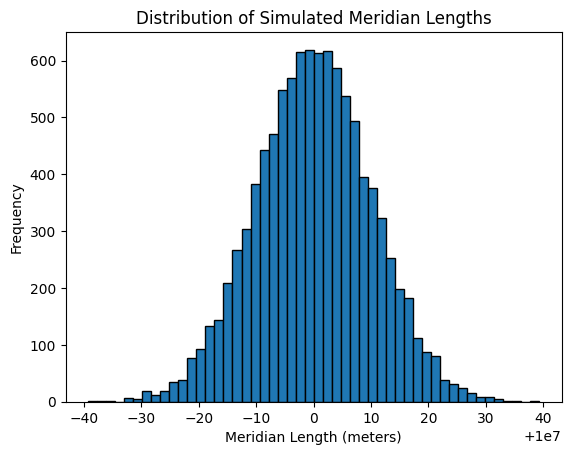

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of simulated lengths
plt.hist(simulated_lengths, bins=50, edgecolor='black')
plt.title('Distribution of Simulated Meridian Lengths')
plt.xlabel('Meridian Length (meters)')
plt.ylabel('Frequency')
plt.show()

- **Interpretation**:
  - Explain how the simulation provides insights into the uncertainty and variability of measurements.
  - Discuss how this method could have assisted in assessing the confidence in their results.

Симуляция демонстрирует неопределённость, генерируя множество измерений с учетом случайного шума, который имитирует ошибки. Анализ распределения этих измерений (вычисление среднего, стандартного отклонения, построение гистограммы) показывает, насколько сильно варьируются результаты вокруг истинного значения.

Кроме того, такой подход помогает определить доверительные интервалы, указывающие на диапазон, в котором с высокой вероятностью находятся истинные значения. Если большая часть симулированных измерений сосредоточена в узком интервале, это свидетельствует о высокой точности измерений и, соответственно, большем доверии к результатам эксперимента.

---

## **6. Продвинутые темы по теории погрешностей**

В этом разделе мы рассмотрим передовые концепции, связанные с ошибками и приближениями, связав их с исторической миссией Пьера Мешена и Жан-Батиста Деламбра по измерению дуги меридиана между Дюнкерком и Барселоной. Эти темы углубят ваше понимание того, как могут распространяться ошибки, как возникают несоответствия и как сложные математические концепции, такие как фракталы и теория хаоса, могут быть связаны с измерениями и аппроксимацией.



<a name="general-formula-of-error"></a>
### **6.1 Общая формула погрешности**

**Исторический контекст**:

Пьер Мешен и Жан-Батист Деламбр стремились к максимальной точности своих измерений, определяя измерительный прибор на основе доли земного меридиана. Понимание и применение общей формулы погрешности имело бы решающее значение для количественной оценки неопределенностей в их измерениях.

**Теория**:

Общая формула погрешности позволяет оценить максимально возможную погрешность в функции, которая зависит от нескольких переменных, каждая из которых имеет свою собственную погрешность измерения. Для функции $ f(x_1, x_2, ..., x_n) $ суммарный дифференциал дает приблизительное значение ошибки в $f$:

$$ \Delta f \approx \left| \frac{\partial f}{\partial x_1} \Delta x_1 \right| + \left| \frac{\partial f}{\partial x_2} \Delta x_2 \right| + \dots + \left| \frac{\partial f}{\partial x_n} \Delta x_n \right| $$

Эта формула позволяет нам оценить, как ошибки во входных переменных влияют на конечный результат.

**Применение к измерению по меридиану**:

Длина измеряемой дуги меридиана зависит от углов и расстояний, каждое из которых имеет свои собственные погрешности измерения. Применение общей формулы погрешности помогло бы оценить общую неопределенность при определении показаний счетчика.

### **Упражнение 6: Общая формула ошибки**

**Задача**:

- Для упрощенной модели рассмотрим расчет расстояния $D$ между двумя точками с использованием триангуляции:

$$
D = \frac{H}{\sin(\theta)}
$$

где:

- $H$ - это базовое измерение (расстояние между двумя известными точками).
- $\theta$ - измеренный угол.

Учитывая погрешности измерений в $H$ и $\theta$, используйте общую формулу для определения погрешности в $D$.

**Инструкции**:
- **Данные**:

In [ ]:
H = 10000  # meters
theta_deg = 30  # degrees
delta_H = 5     # measurement error in H (meters)
delta_theta_deg = 0.01  # measurement error in theta (degrees)

- **Преобразование угла в радианы**:

In [ ]:
theta = np.radians(theta_deg)
delta_theta = np.radians(delta_theta_deg)

- **Определите функцию $D(H, \theta)$**:

In [ ]:
def D(H, theta):
    return H / np.sin(theta)

- **Вычислите частные производные**:

In [ ]:
# Compute partial derivative with respect to H
def partial_D_H(H, theta):
    return 1 / np.sin(theta)


# Compute partial derivative with respect to theta
def partial_D_theta(H, theta):
    return -H * np.cos(theta) / (np.sin(theta))**2

- **Вычислите абсолютную погрешность в $D$, используя общую формулу погрешности**:

In [ ]:
# Calculate partial derivatives at the given values
partial_H = partial_D_H(H, theta)
partial_theta = partial_D_theta(H, theta)

# Calculate the total error
delta_D = abs(partial_H * delta_H) + abs(partial_theta * delta_theta)

print(f"Estimated Error in D: {delta_D:.2f} meters")

Estimated Error in D: 16.05 meters


- **Вычислите относительную погрешность**:

In [ ]:
relative_error = delta_D / D(H, theta)
print(f"Relative Error: {relative_error * 100:.4f}%")

Relative Error: 0.0802%


<a name="inverse-problem-of-error-theory"></a>
## **6.2 Обратная задача теории ошибок**

**Исторический контекст**:

Во время своей экспедиции Мешену и Деламбру часто приходилось отступать от результатов наблюдений, чтобы сделать вывод о начальных условиях или скорректировать измерения, особенно когда они имели дело с накопленными ошибками.

**Теория**:

Обратная задача теории ошибок заключается в нахождении исходных входных значений с учетом результатов измерений и модели влияния ошибок на эти измерения. Это имеет решающее значение в таких областях, как астрономия и геодезия, где широко распространены косвенные измерения.

**Применение для измерения по меридиану**:

Предположим, что на некоторые измерения повлияли постоянные ошибки, вызванные неправильной калибровкой прибора. Решение обратной задачи помогло бы скорректировать записанные значения, чтобы они соответствовали истинным измерениям.

### **Упражнение 7: Обратная задача теории ошибок**

**Задача**:

- Задано измеренное расстояние $D_{\text{measured}}$, на которое влияет неизвестная систематическая ошибка $\epsilon$, и модель, которая связывает их:

$$
D_{\text{measured}} = D_{\text{true}} (1 + \epsilon)
$$

- Если вы знаете $D_{\text{measured}}$ и имеете приблизительное значение $\epsilon$, вычислите $D_{\text{true}}$.

**Инструкции**:

- **Данные**:

In [ ]:
D_measured = 10050  # meters
epsilon_estimate = 0.005  # estimated systematic error (0.5%)

- **Вычислите истинное расстояние**:

In [ ]:
D_true = D_measured / (1 + epsilon_estimate)
print(f"Estimated True Distance: {D_true:.2f} meters")

Estimated True Distance: 10000.00 meters


<a name="discrepancies-theory"></a>
## **6.3 Теория несоответствий (discrepancies)**

**Исторический контекст**:

несоответствия между ожидаемыми и наблюдаемыми измерениями были обычным явлением во время экспедиции "Меридиан". Понимание и анализ этих расхождений помогли бы усовершенствовать методы измерений и исправить ошибки.

**Теория**:

Теория несоответствий предполагает изучение распределения различий между наблюдаемыми данными и ожидаемыми значениями, часто для выявления закономерностей, смещений или случайных ошибок.

**Применение к измерениям по меридиану**:

Проанализировав расхождения в угловых измерениях или расстояниях, Мешен и Деламбр могли бы выявить систематические ошибки или несоответствия в своих данных.

### **Упражнение 8: Анализ распределения несоответствий**

**Задание**:

- Учитывая набор ожидаемых и наблюдаемых угловых измерений, вычислите расхождения и проанализируйте их распределение.

**Инструкции**:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

- **Данные**:

In [ ]:
expected_angles_deg = np.array([30, 45, 60, 75, 90])  # degrees
observed_angles_deg = np.array([29.98, 44.95, 60.05, 75.02, 89.97])  # degrees
discrepancies = observed_angles_deg - expected_angles_deg

- **Постройте график распределения несоответствий**:

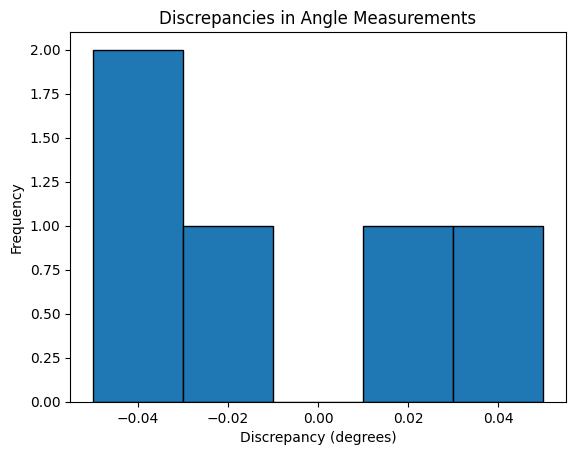

In [ ]:
plt.hist(discrepancies, bins=5, edgecolor='black')
plt.title('Discrepancies in Angle Measurements')
plt.xlabel('Discrepancy (degrees)')
plt.ylabel('Frequency')
plt.show()

- **Проанализируйте результаты**:

  - Распределены ли расхождения случайным образом?
  - Есть ли признаки систематической ошибки?

- Несоответствия находятся в диапазоне ±0.05°, что указывает на малые случайные погрешности.
- Распределение близко к симметричному, без явных систематических смещений.

<a name="the-coastline-paradox"></a>
## **6.4 Парадокс береговой линии**

**Исторический контекст**:

Хотя парадокс береговой линии был официально описан гораздо позже, задача измерения неправильных форм была актуальна во времена Мешена и Деламбра, особенно при картографировании береговой линии Франции или неровной местности, что могло повлиять на их базовые измерения.

**Теория**:

Парадокс береговой линии связан с парадоксальным наблюдением о том, что длина береговой линии может сильно варьироваться в зависимости от используемой шкалы измерений. Это связано с тем, что береговые линии похожи на фракталы и имеют сложность в нескольких масштабах.

**Применение к измерениям по меридианам**:

Понимание сложности естественных границ могло бы помочь оценить ограничения методов измерения и необходимость в согласованных масштабах.

### **Упражнение 9: Исследуем парадокс береговой линии**

**Задача**:

- Смоделируйте измерение фрактальной береговой линии, используя различные шкалы измерений, и понаблюдайте, как меняется общая длина.

**Инструкции**:

- **Определите функцию для генерации кривой Коха**:

In [ ]:
def koch_curve(order, scale=1):
    def recursive_koch(points, order):
        if order == 0:
            return points
        else:
            new_points = []
            for i in range(len(points) - 1):
                p0 = points[i]
                p4 = points[i + 1]
                delta = (p4 - p0) / 3
                p1 = p0 + delta
                p3 = p0 + 2 * delta
                angle = np.pi / 3
                rotation = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle),  np.cos(angle)]])
                p2 = p1 + rotation.dot(delta)
                new_points.extend([p0, p1, p2, p3])
            new_points.append(points[-1])
            return recursive_koch(np.array(new_points), order - 1)
    initial_points = np.array([[0, 0], [scale, 0]])
    return recursive_koch(initial_points, order)

- **Измерьте длину с помощью различных масштабов**:

In [ ]:
scales = [1, 0.5, 0.25, 0.125]  # Measurement scales
lengths = []

for s in scales:
    order = int(np.log2(1 / s))
    points = koch_curve(order, scale=1)
    # Calculate segment lengths
    distances = np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1))
    total_length = np.sum(distances)
    lengths.append(total_length)

- **Постройте график длины в зависимости от масштаба**:

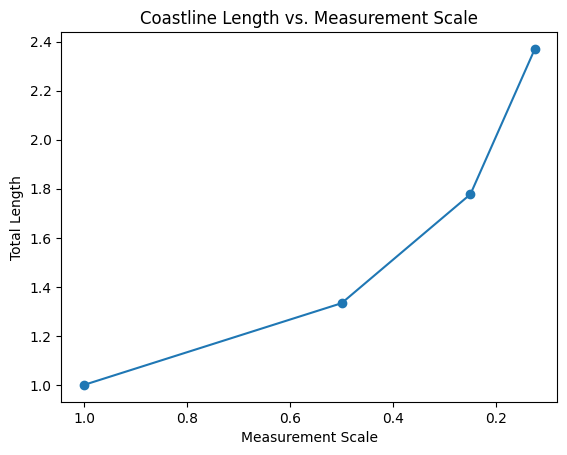

In [ ]:
plt.figure()
plt.plot(scales, lengths, marker='o')
plt.xlabel('Measurement Scale')
plt.ylabel('Total Length')
plt.title('Coastline Length vs. Measurement Scale')
plt.gca().invert_xaxis()
plt.show()

- **Проанализируйте результаты**:

  - Опишите, как изменяется измеренная длина в зависимости от шкалы измерений.
  - Соотнесите это с трудностями, связанными с точными измерениями во время экспедиции.

При уменьшении масштаба измерения учитываются все мелкие изгибы линии, и итоговая длина резко возрастает. Это иллюстрирует, что измерения береговой линии зависят от выбранной шкалы, что создавало трудности для экспедиционных картографов, ограниченных точностью приборов.

<a name="основы теории фракталов"></a>
## **6.5 Основы теории фракталов**

**Исторический контекст**:

Несмотря на то, что теория фракталов была разработана спустя столетия после экспедиции на меридиан, в мире природы существуют фрактальные структуры, которые могли повлиять на точность измерений.

**Теория**:

Фракталы - это сложные структуры, которые проявляют самоподобие в разных масштабах. Они имеют нецелые (фрактальные) размеры, что усложняет традиционные методы измерения.

**Применение для измерения по меридианам**:

Неровная местность и объекты с фрактальными характеристиками могут затруднить точное измерение расстояний с использованием прямолинейных приближений.

### **Упражнение 10: Генерация и измерение фракталов**

**Задача**:

- Сгенерируйте простой фрактал (например, треугольник Серпинского) и вычислите его периметр и площадь на разных уровнях итерации.

**Инструкции**:

- **Определите функцию для генерации треугольника Серпинского**:

In [ ]:
def sierpinski_triangle(order, points):
    if order == 0:
        return [points]
    else:
        triangles = []
        mid_points = [
            (points[0] + points[1]) / 2,
            (points[1] + points[2]) / 2,
            (points[2] + points[0]) / 2
        ]
        triangles += sierpinski_triangle(order - 1, [points[0], mid_points[0], mid_points[2]])
        triangles += sierpinski_triangle(order - 1, [mid_points[0], points[1], mid_points[1]])
        triangles += sierpinski_triangle(order - 1, [mid_points[2], mid_points[1], points[2]])
        return triangles

- **Рассчитайте периметр и площадь**:

In [ ]:
import matplotlib.pyplot as plt

initial_points = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

orders = [0, 1, 2, 3]
perimeters = []
areas = []

for order in orders:
    triangles = sierpinski_triangle(order, initial_points)
    perimeter = 0
    area = 0
    for tri in triangles:
        # Calculate side lengths
        a = np.linalg.norm(tri[0] - tri[1])
        b = np.linalg.norm(tri[1] - tri[2])
        c = np.linalg.norm(tri[2] - tri[0])
        s = (a + b + c) / 2
        # Calculate perimeter and area
        perimeter += (a + b + c)
        area += np.sqrt(s * (s - a) * (s - b) * (s - c))
    perimeters.append(perimeter)
    areas.append(area)

- **Постройте график с результатами**:

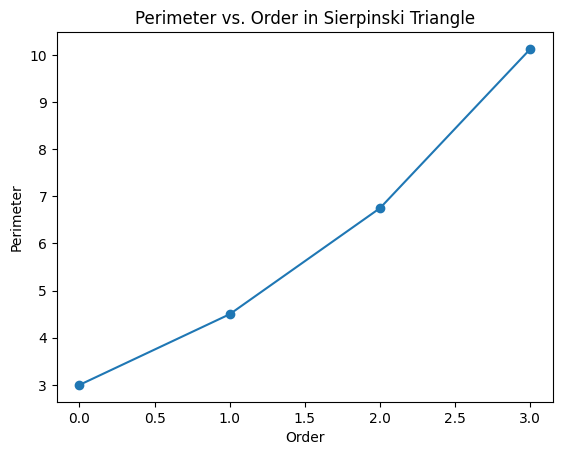

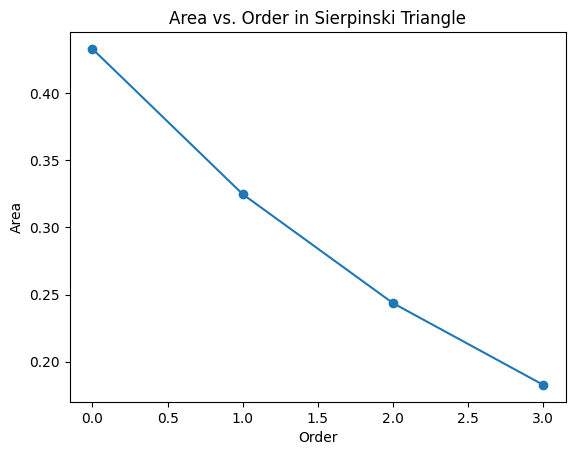

In [ ]:
plt.figure()
plt.plot(orders, perimeters, marker='o')
plt.xlabel('Order')
plt.ylabel('Perimeter')
plt.title('Perimeter vs. Order in Sierpinski Triangle')
plt.show()

plt.figure()
plt.plot(orders, areas, marker='o')
plt.xlabel('Order')
plt.ylabel('Area')
plt.title('Area vs. Order in Sierpinski Triangle')
plt.show()

- **Проанализируйте результаты**:

  - Понаблюдайте, как увеличивается периметр, в то время как площадь уменьшается или остается постоянной.
  - Обсудите последствия для точности измерений.

При генерации фрактала, как треугольника Серпинского, периметр увеличивается с каждым уровнем итерации, в то время как площадь остаётся либо постоянной, либо сокращается. Это иллюстрирует сложности измерений объектов с фрактальными свойствами, когда традиционные методы, предполагающие целые размеры, становятся недостаточно точными.

<a name="basics-of-chaos-theory"></a>
## **6.6 Основы теории хаоса**

**Исторический контекст**:

Хотя теория хаоса возникла в 20 веке, чувствительность к начальным условиям была концепцией, которая могла повлиять на повторные измерения во время экспедиции.

**Теория**:

Теория хаоса изучает системы, которые очень чувствительны к начальным условиям, что приводит к кажущемуся случайным и непредсказуемым поведению в детерминированных системах.

**Применение к измерениям по меридиану**:

Небольшие ошибки в начальных измерениях или условиях могут привести к значительным отклонениям в результатах, что подчеркивает необходимость в точности.

### **Упражнение 11: Чувствительность к начальным условиям**

**Задача**:

- Исследуйте простую хаотическую систему, такую как логистическая карта, чтобы проиллюстрировать чувствительность к начальным условиям.

**Инструкции**:

- **Определите функцию логистической карты**:

In [ ]:
def logistic_map(r, x):
    return r * x * (1 - x)

- **Промоделируйте логистическую карту для двух близких начальных условий**:

In [ ]:
r = 3.99  # Parameter value in chaotic regime
x0 = 0.5
x1 = x0 + 1e-8  # Slightly different initial condition

iterations = 100
x_values_0 = [x0]
x_values_1 = [x1]

for i in range(iterations):
    x0 = logistic_map(r, x0)
    x1 = logistic_map(r, x1)
    x_values_0.append(x0)
    x_values_1.append(x1)

- **Постройте график по результатам**:

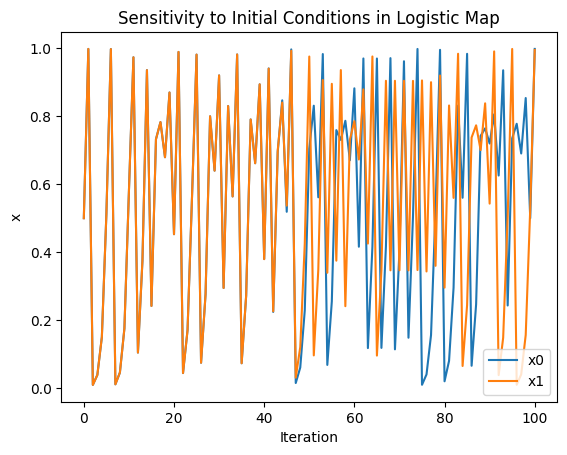

In [ ]:
plt.figure()
plt.plot(range(iterations + 1), x_values_0, label='x0')
plt.plot(range(iterations + 1), x_values_1, label='x1')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Sensitivity to Initial Conditions in Logistic Map')
plt.legend()
plt.show()

- **Проанализируйте результаты**:

  - Обсудите, как небольшие различия в начальных условиях приводят к большим расхождениям.
  - Объясните это важностью точности измерений во время экспедиции.

Небольшая разница в начальных условиях приводит к экспоненциальному расходу траекторий, что демонстрирует хаотическое поведение системы. Это подчёркивает, что даже незначительные ошибки в начальных данных могут привести к существенным отклонениям в результатах измерений, что критично для экспедиционных работ.

---

<a name="conclusion"></a>
Понимание ошибок и управление ими является краеугольным камнем вычислительной математики, точно так же, как это было важно для Мешена и Деламбра в их стремлении дать определение счетчику. С помощью этого блокнота вы изучили:

- Типы и источники ошибок.
- Методы вычисления и минимизации ошибок.
- Как современные численные методы могли бы помочь историческим научным исследованиям.
- Какое глубокое влияние ошибки могут оказать на научные достижения.

По мере продвижения в учебе и карьере умение распознавать ошибки и устранять их будет иметь неоценимое значение.

---

<a name="references"></a>
## **7. Источники**

- Alder, K. (2002). *The Measure of All Things: The Seven-Year Odyssey and Hidden Error That Transformed the World*. Free Press.
- NumPy, Matplotlib and SciPy documentation.
- Articles on numerical methods and error analysis.
- Gauss, C. F. (1809). *Theoria motus corporum coelestium in sectionibus conicis solem ambientium*.
- Mandelbrot, B. (1982). *The Fractal Geometry of Nature*. W.H. Freeman.
- Gleick, J. (1987). *Chaos: Making a New Science*. Viking.

---